# Loading the data

This example shows how to first load the network structure, and then how to load the simulation data.

In [4]:
network_path = "networks/VBT_kir_scan/"

## Loading the network structure

In [5]:
from snudda import SnuddaLoad
sl = SnuddaLoad(network_path)

In [6]:
sl.data.keys()

dict_keys(['network_file', 'config', 'num_neurons', 'neuron_id', 'num_synapses', 'num_gap_junctions', 'synapses', 'gap_junctions', 'synapse_coords', 'config_file', 'position_file', 'slurm_id', 'simulation_origo', 'voxel_size', 'snudda_data', 'neurons', 'neuron_positions', 'name', 'population_unit', 'connectivity_distributions'])

In [10]:
dspn_id = sl.get_neuron_id_of_type("dSPN")

In [11]:
sl.data["neurons"][dspn_id[0]]

{'name': 'dSPN_0',
 'morphology': '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20220620/morphology/WT-0728MSN01-cor-rep-ax-res3-var8.swc',
 'type': 'dSPN',
 'neuron_id': 0,
 'volume_id': 'Striatum',
 'hoc': '',
 'neuron_path': '$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20220620',
 'position': array([0.00424381, 0.00344045, 0.00673498]),
 'rotation': array([[-0.37359772,  0.7988934 ,  0.47137467],
        [ 0.78180431, -0.00229201,  0.62351966],
        [ 0.49920614,  0.60146828, -0.62372201]]),
 'virtual_neuron': False,
 'axon_density_type': None,
 'axon_density': None,
 'axon_density_bounds_xyz': None,
 'axon_density_radius': nan,
 'parameter_key': 'pd4bd01a9',
 'morphology_key': 'm4a48752c',
 'modulation_key': None,
 'reaction_diffusion_file': None,
 'population_unit': 0}

Use ```sl.get_centre_neurons_iterator``` to get the central part of the neuron population.

In [25]:
center_neuron_id = list(sl.get_centre_neurons_iterator(n_neurons=1000))

You can get the connection matrix with ```sl.create_connectoin_matrix()``` the underlying data is stored in ```sl.data["synapses"]```, with one row per synapse, first column is presynaptic neuron id, second column is postsynaptic id.

In [13]:
con_matrix = sl.create_connection_matrix()

In [26]:
sl.data["synapses"]

array([[    77,      0,    288, ...,    304,    226, 787255],
       [    77,      0,    289, ...,    775,    237, 787255],
       [    77,      0,    292, ...,    558,    400, 787255],
       ...,
       [  9471,   9809,   1251, ...,    554,    292, 126166],
       [  9471,   9809,   1247, ...,    101,     94, 126166],
       [  9471,   9809,   1257, ...,    218,    148, 126166]], dtype=int32)

[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 114
[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 143
[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 36
[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 102
[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 176
[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 62
[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 54
[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 98
[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 128
[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 114
[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 54
[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 79
[terpsichore:3568026] tcp_peer_recv_connect_ack: invalid header type: 49
[terpsichore:3568026] tcp_peer_recv_connect_a

## Loading the simulation data

In [16]:
import os
from snudda.utils import SnuddaLoadSimulation
output_file_WT = os.path.join(network_path, "simulations", "output_kir_1.0.hdf5")
sls = SnuddaLoadSimulation(network_simulation_output_file=output_file_WT)

Loading networks/VBT_kir_scan/simulations/output_kir_1.0.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [   0    1    2 ... 9667 9668 9669]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
1367: (LTS_0, p7f931884, m803558b5)
1463: (LTS_1, pdc4da746, ma4dacccf)
1921: (LTS_0, p1fd33c8c, m803558b5)
2897: (LTS_0, p1fd33c8c, m803558b5)
4057: (LTS_1, p54dfea77, m8ded5e00)
4511: (LTS_1, p266c7fb8, mf4ba6a4e)
5184: (LTS_1, pe675a3d7, m872fbb26)
5185: (LTS_1, p664ecb6e, m872fbb26)
5186: (LTS_1, p4d93b0c3, m8ded5e00)
5371: (LTS_1, p664ecb6e, m872fbb26)
5372: (LTS_1, pd2b66278, m872fbb26)
6546: (LTS_0, p1fd33c8c, m803558b5)
6733: (LTS_1, pdc4da746, ma4dacccf)
6851: (LTS_1, pd2b66278, m872fbb26)
6952: (LTS_0, pe9c8b984, m803558b5)
9096: (LTS_1, p53b70df2, ma4dacccf)
9357: (LTS_0, p1fd33c8c, m803558b5)


In [17]:
spikes_0 = sls.get_spikes(neuron_id=0)

Spike time is in seconds

In [19]:
spikes_0

array([[0.382   , 0.82975 , 0.9554  , 1.0435  , 1.32845 , 1.581175,
        2.64415 , 2.737325, 3.611   , 3.9507  , 4.159275, 4.536575,
        4.788575, 5.665925, 5.714225, 5.78175 , 6.18265 , 6.220175,
        6.465975, 7.6796  , 7.81035 , 7.961575, 8.595825, 8.8656  ,
        9.051325]])

In [20]:
voltage_0 = sls.get_voltage(neuron_id=0)

In [21]:
time = sls.get_time()

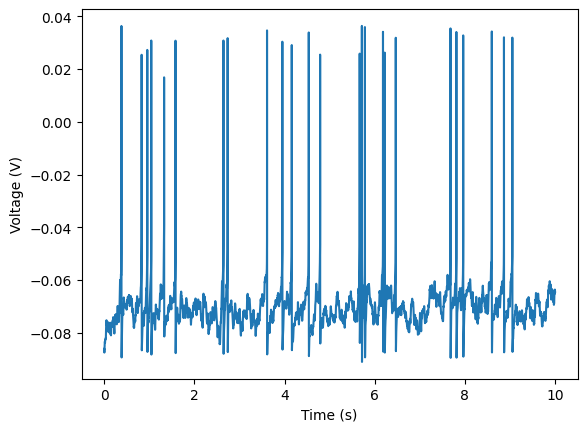

In [24]:
import matplotlib.pyplot as plt
plt.plot(time, voltage_0)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()